# Exploring Text Data


## Load the data - talks

Firstly, we load all the data into the `documents` dictionary

We also merge the documents into one big string, `corpus_all_in_one`, for convenience

In [1]:
import os

data_dir = os.path.join('..', 'data')

talk_types = ['keynotes', 'workshops', 'talks']

# paths like ['../data/keynotes/folklore-and-fantasy-in-the-information-age.md',
all_talk_files = [os.path.join(data_dir, talk_type, fname)
                  for talk_type in talk_types
                  for fname in os.listdir(os.path.join(data_dir, talk_type))]

documents = {}
for talk_file_name in all_talk_files:
    base_name = os.path.basename(talk_file_name)
    talk_title = os.path.splitext(base_name)[0]
    with open(talk_file_name, 'r') as f:
        content = f.read()
        documents[talk_title] = content
        
corpus_all_in_one = ' '.join([doc for doc in documents.values()])
        
print("Number of talks: {}".format(len(all_talk_files)))
print("Corpus size (char): {}".format(len(corpus_all_in_one)))

Number of talks: 101
Corpus size (char): 78067


In [2]:
all_talk_files

['../data/keynotes/folklore-and-fantasy-in-the-information-age.md',
 '../data/workshops/django-cms-application-a-comprehensive-approach.md',
 '../data/workshops/software-carpentry.md',
 '../data/workshops/adventures-in-python-with-send-students.md',
 '../data/workshops/natural-language-processing-in-10-lines-of-code.md',
 '../data/workshops/creative-learning-and-computational-thinking-across-the-curriculum.md',
 '../data/workshops/property-based-testing-with-hypothesis.md',
 '../data/workshops/hands-on-kubernetes-management-with-python-using-kube.md',
 '../data/workshops/how-to-land-the-right-job-for-you.md',
 '../data/workshops/dive-into-object-oriented-python.md',
 '../data/workshops/users-are-not-the-only-people.md',
 '../data/workshops/data-wrangling-with-python.md',
 '../data/workshops/building-a-single-page-application-with-django-and-emberjs.md',
 '../data/workshops/an-introduction-to-deep-learning.md',
 '../data/workshops/natural-language-processing-with-python.md',
 '../data/w

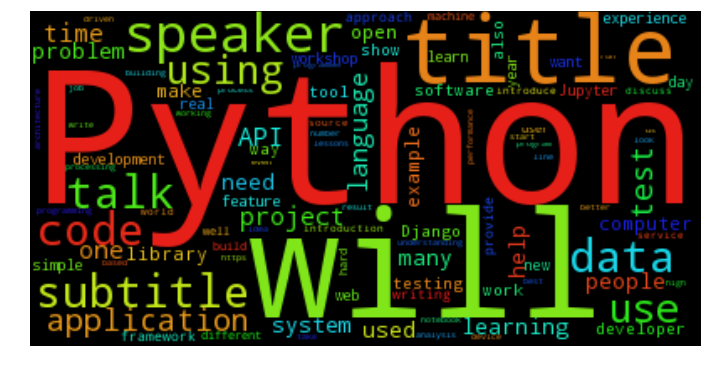

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_words=100)
cloud.generate_from_text(corpus_all_in_one)

plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [4]:
all_talk_files[0]

'../data/keynotes/folklore-and-fantasy-in-the-information-age.md'

In [5]:
%cat {all_talk_files[0]}

# For a list of magics type:
# %lsmagic

title: 'Folklore and fantasy in the information age'
subtitle:
speaker: gail-ollis
---


Problem every file has metadata. Let's remove them.
Removing title subtitle and speaker of content of files

In [6]:
documents = {}
for talk_file_name in all_talk_files:
    base_name = os.path.basename(talk_file_name)
    talk_title = os.path.splitext(base_name)[0]
    with open(talk_file_name, 'r') as f:
        content = ""
        for line in f:
            if line.startswith('title:'):
                line = line[6:]
            if line.startswith('subtitle:') \
            or line.startswith('speaker:') \
            or line.startswith('---'):
                continue
            content += line
        documents[talk_title] = content

corpus_all_in_one = ' '.join([doc for doc in documents.values()])
corpus_all_in_one

' \'My journey from wxPython to PyQt\'\nI used to use wxPython for all my GUI work but I now use PyQt5 and will share why I made the change, the approach I took and difficulties encountered.\n  \'Some challenges in automatic English text correction\'\nSome applications in the market assist users to correct different writing mistakes, including spelling and grammar errors. However, very rarely these tools are used by school teachers. For most of them, it is still time consuming and tedious to correct (beginners) student essays.\n\nThis talk will introduce some challenges in automatic English text correction. It will also present how it is possible to use Python libraries (scikit-learn, SciPy and NumPy) in order to spot English mistakes such as: articles, capitalization and spelling.\n\nIn order to train and test the classifier, an open dataset will be used: EF-Cambridge Open Language Dataset (https://corpus.mml.cam.ac.uk/efcamdat/).\n\nDuring the presentation, the accuracy of the implem

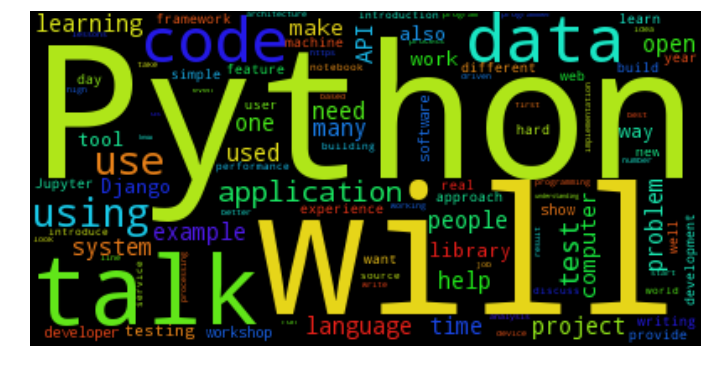

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_words=100)
cloud.generate_from_text(corpus_all_in_one)

plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [8]:
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_list = stopwords.words('english') + list(string.punctuation)

document_frequency = Counter()

for talk_id, content in documents.items():
    try:  # py3
        tokens = word_tokenize(content)
    except UnicodeDecodeError:  # py27
        tokens = word_tokenize(content.decode('utf-8'))
    unique_tokens = [token.lower() for token in set(tokens)
                     if token.lower() not in stop_list]
    document_frequency.update(unique_tokens)

for word, freq in document_frequency.most_common(20):
    print("{}\t{}".format(word, freq))

python	63
talk	59
code	37
using	36
use	33
's	31
data	28
used	21
'll	21
also	19
help	19
many	19
one	19
time	18
development	18
language	18
learning	18
''	17
library	16
people	16


In [9]:
# print(stop_list)
for item in ['will', "'ll", 'll']:
    print("{} in stop_list == {}".format(item, item in stop_list))

will in stop_list == True
'll in stop_list == False
ll in stop_list == True


Make n-grams 

In [10]:
from nltk import ngrams

try:
    all_tokens = [t for t in word_tokenize(corpus_all_in_one)]
except UnicodeDecodeError:
    all_tokens = [t for t in word_tokenize(corpus_all_in_one.decode('utf-8'))]

bigrams = ngrams(all_tokens, 2)
trigrams = ngrams(all_tokens, 3)

bi_count = Counter(bigrams)
tri_count = Counter(trigrams)

for phrase, freq in bi_count.most_common(20):
    print("{}\t{}".format(phrase, freq))
    
for phrase, freq in tri_count.most_common(20):
    print("{}\t{}".format(phrase, freq))

(',', 'and')	82
('of', 'the')	56
('.', 'This')	41
('how', 'to')	40
('This', 'talk')	31
('is', 'a')	31
('talk', 'will')	28
('will', 'be')	25
('.', 'We')	24
('.', 'In')	24
('in', 'the')	24
('.', 'I')	23
('and', 'how')	23
(',', 'the')	21
('.', 'It')	21
('some', 'of')	21
('can', 'be')	21
('.', 'The')	21
('you', 'can')	20
('In', 'this')	20
('This', 'talk', 'will')	21
('.', 'This', 'talk')	21
('.', 'In', 'this')	16
('some', 'of', 'the')	15
('.', 'We', "'ll")	12
('(', 'https', ':')	11
('In', 'this', 'talk')	11
('as', 'well', 'as')	9
(']', '(', 'https')	9
('this', 'talk', ',')	8
('?', 'This', 'talk')	8
('and', 'how', 'to')	8
('how', 'you', 'can')	8
('.', 'I', 'will')	7
('one', 'of', 'the')	6
(',', 'and', 'how')	6
('.', 'We', 'will')	6
('how', 'to', 'use')	5
('to', 'build', 'a')	5
(',', 'we', "'ll")	5


## Term Frequency (TF)

TF provides a weight of a term within a document, based on the term frequency

TF(term, doc) = count(term in doc)

TF(term, doc) = count(term in doc) / len(doc)


## Inverse Document Frequency (IDF)

IDF provides a weight of a term across the collection, based on the document frequency of such term

IDF(term) = log( N / DF(term) )

IDF(term) = log( 1 + N / DF(term) )

## Introducing sklearn

So far, we have used some homemade implementation to count words

What if we need something more involved?

sklearn (http://scikit-learn.org/) is one of the main libraries for Machine Learning in Python

With an easy-to-use interface, it provides support for a variety of Machine Learning models

We're going to use it to tackle a Text Classification problem


In [11]:
from random import randint

winner = randint(1, 36)

print("And the winner is ... {}".format(winner))

And the winner is ... 16


Pos_tag for tagging what each word for categorization


In [16]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

s = "The quick brown fox jumped over the dog"
tokens = word_tokenize(s)
tokens


['The', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'dog']

In [17]:
pos_tag(tokens)

[('The', 'DT'),
 ('quick', 'JJ'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('jumped', 'VBD'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('dog', 'NN')]